### 4. 정규분포와 중심극한정리

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

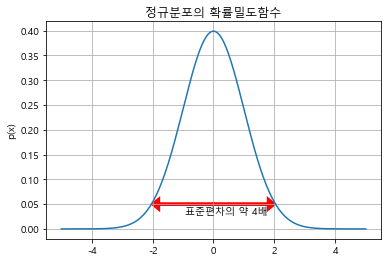

In [5]:
xx = np.linspace(-5, 5, 200)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, "표준편차의 약 4배")
plt.ylabel("p(x)")
plt.title("정규분포의 확률밀도함수")
plt.grid()
plt.show()

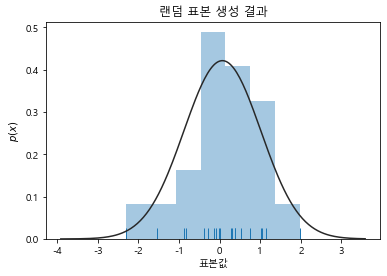

In [6]:
x = rv.rvs(20, random_state=2022)
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

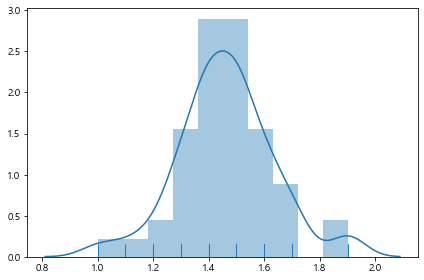

In [7]:
# 예제: 붓꽃 데이터
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50, 2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

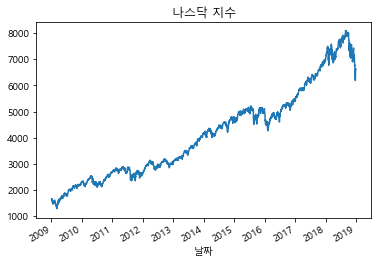

In [8]:
# 예제: 주식 수익률
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2018-12-31")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [10]:
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print(f"평균 일간수익률: {mean * 100:3.2f}%")
print(f"평균 일간변동성: {std * 100:3.2f}%")

평균 일간수익률: 0.06%
평균 일간변동성: 1.17%


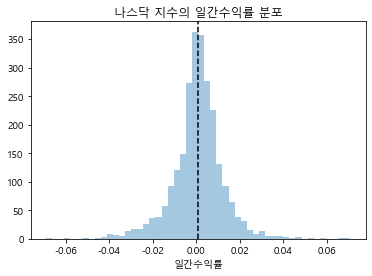

In [11]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

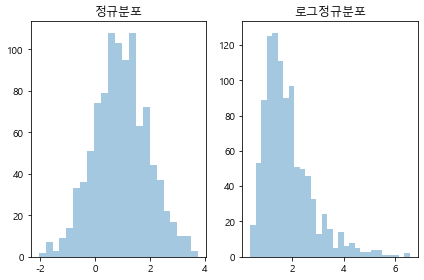

In [12]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

- Q-Q 플롯

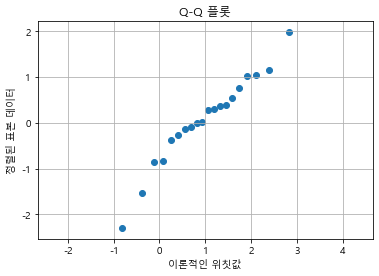

In [14]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

x_sorted = np.sort(x)
position = _calc_uniform_order_statistic_medians(len(x))
qf = rv.ppf(position)
plt.scatter(qf, x_sorted)
plt.title("Q-Q 플롯")
plt.xlabel("이론적인 위칫값")
plt.ylabel("정렬된 표본 데이터")
plt.axis("equal"), plt.grid()
plt.show()

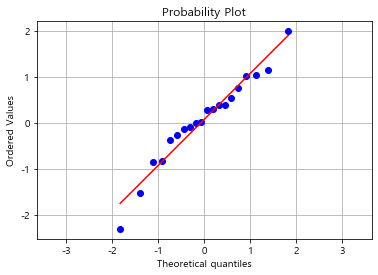

In [17]:
np.random.seed(0)
# plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal"), plt.grid()
plt.show()

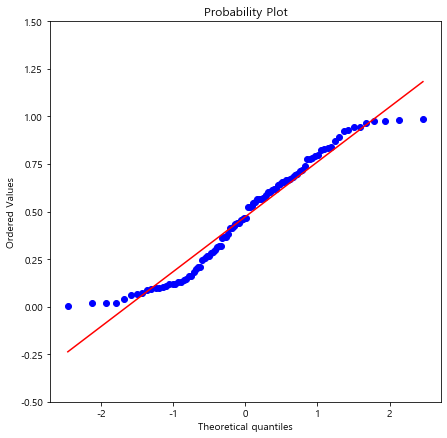

In [18]:
# 정규분포를 따르지 않는 데이터 표본
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5), plt.grid()
plt.show()

- 중심극한정리<br>
    N 개의 임의의 분포로부터 얻은 표본의 평균은 N이 증가할수록 기댓값이 μ, 분산이 σ*σ/N인 정규분포로 수렴한다.

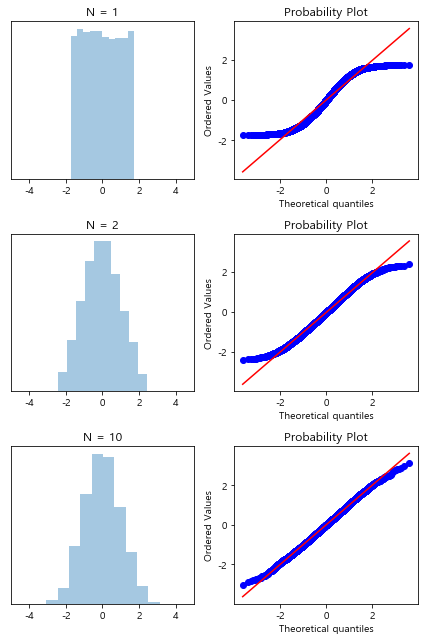

In [19]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

### 5. 스튜던트 t분포, 카이제곱분포, F분포

- 스튜던트 t분포

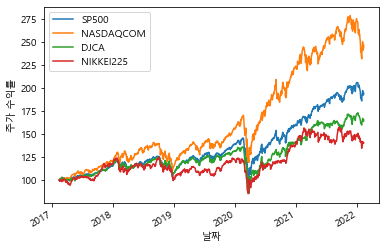

In [21]:
symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.xlabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

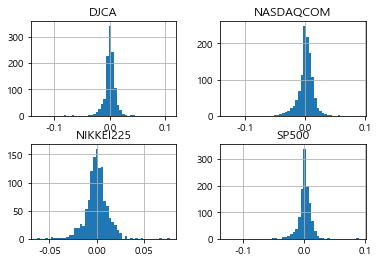

In [24]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

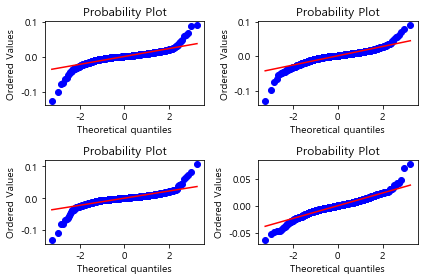

In [25]:
# Q-Q plot
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

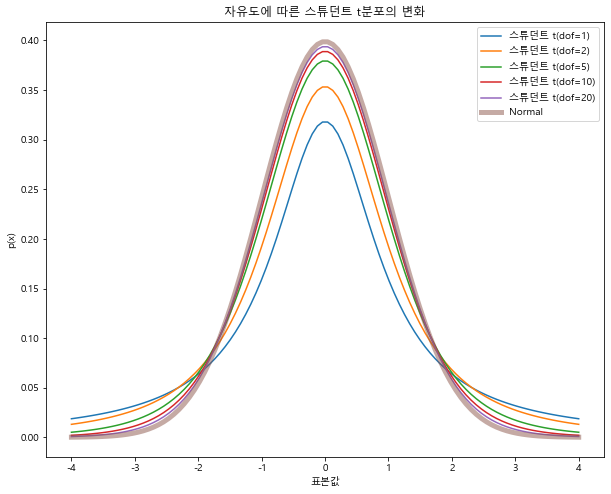

In [27]:
xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10,8))
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=(f"스튜던트 t(dof={df})"))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

- t 통계량
    - 표본평균을 표본표준편차로 정규화한 값을 t 통계량이라 함
    - t 통계량은 자유도가 N−1인 스튜던트 t분포

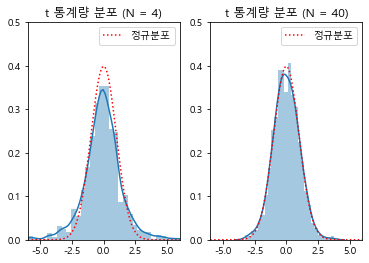

In [28]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

plt.show()

- 카이제곱분포

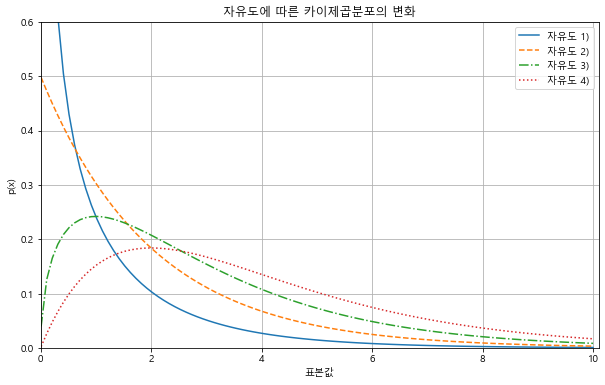

In [30]:
xx = np.linspace(0.01, 10, 100)
plt.figure(figsize=(10,6))
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend(), plt.grid()
plt.show()

- F 분포

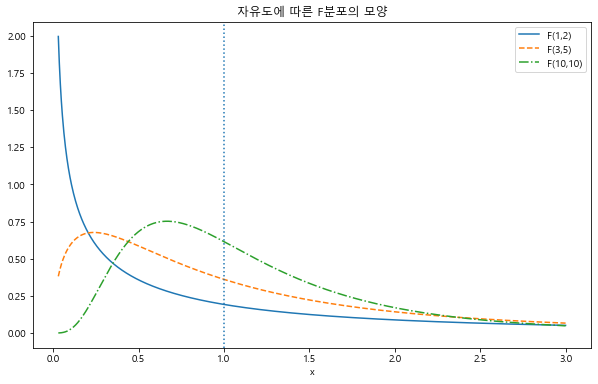

In [31]:
xx = np.linspace(0.03, 3, 1000)
plt.figure(figsize=(10,6))
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()